In [3]:
cd

C:\Users\User


In [4]:
import pandas as pd
import numpy as np
from itertools import product # iterative combinations
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.linear_model import *
from sklearn.cluster import KMeans

In [5]:
train=pd.read_csv('./Desktop/kaggle_semi_project/sales_train.csv')
test=pd.read_csv('./Desktop/kaggle_semi_project/test.csv')
item_cat=pd.read_csv('./Desktop/kaggle_semi_project/item_categories.csv')
items=pd.read_csv('./Desktop/kaggle_semi_project/items.csv')
shops=pd.read_csv('./Desktop/kaggle_semi_project/shops.csv')
sample_sub=pd.read_csv('./Desktop/kaggle_semi_project/sample_submission.csv')

In [6]:
train.drop_duplicates(keep = 'first',inplace = True)

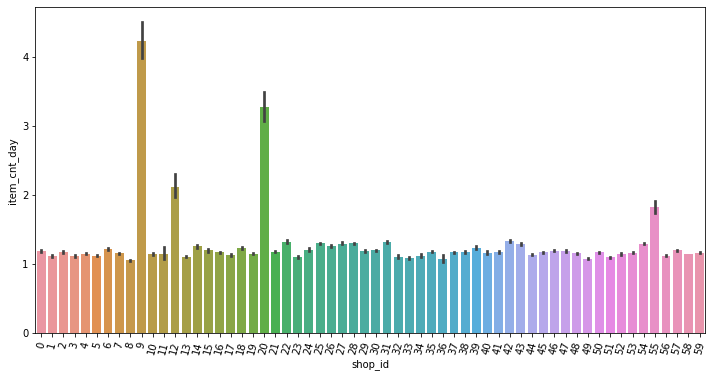

In [7]:

plt.figure(figsize=(12,6))
sns.barplot(x='shop_id',y='item_cnt_day',data=train)
plt.xticks(rotation=75)
plt.show() #9번가게,12번가게,20번가게,55번가게는 다른가게들보다 장사가 잘되는듯? 그렇다면 이가게들의 특성은 판매량과 연결될수있을듯

<AxesSubplot:xlabel='date_block_num', ylabel='item_cnt_day'>

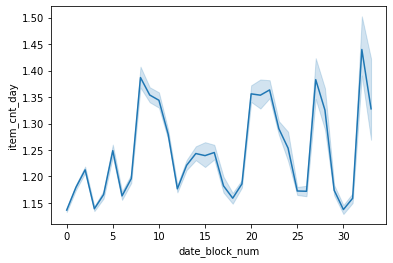

In [8]:
sns.lineplot(x='date_block_num',y='item_cnt_day',data=train)#2013년~2015년까지 월별로 판매량이 시계열성이 있는것을 알수있다.

<AxesSubplot:xlabel='item_price', ylabel='item_cnt_day'>

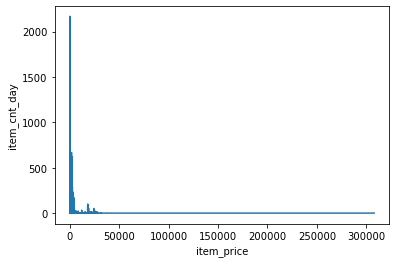

In [9]:
sns.lineplot(x='item_price',y='item_cnt_day',data=train) #잘은모르겠지만 가격이 높을수록 판매량이 적어지는듯

<AxesSubplot:xlabel='item_id', ylabel='Count'>

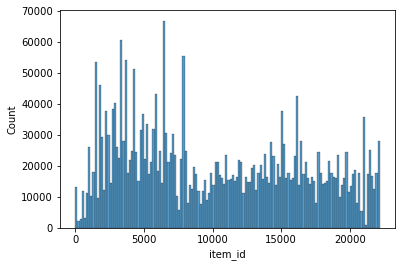

In [10]:
sns.histplot(x='item_id',data=train) #물품종목의 분포가 어떤지 확인 정규분포는 아닌듯

In [11]:
df=train.copy()

In [12]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [13]:
item_cat.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [14]:
item_df=pd.merge(items,item_cat,how='left',on='item_category_id')

In [15]:
item_df.head() # 아이템카테고리 자료와 아이템 자료를 아이템 카테고리 이름으로 합쳐서 보기위함

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,Программы - Для дома и офиса (Цифра)
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
4,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD


In [16]:
item_df=item_df[['item_category_name','item_name','item_category_id','item_id']]

In [17]:
sample_sub.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [18]:
sorted(train['shop_id'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59]

In [19]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [20]:
test['shop_id'].unique() #샵아디 몇개가빠졋네.. 이유가뭘까>? 내생각엔 랜덤으로 섞어서 몇개만 넣은듯 트레인0~59까지를 바탕으로 학습후 예측해보기위해

array([ 5,  4,  6,  3,  2,  7, 10, 12, 28, 31, 26, 25, 22, 24, 21, 15, 16,
       18, 14, 19, 42, 50, 49, 53, 52, 47, 48, 57, 58, 59, 55, 56, 36, 37,
       35, 38, 34, 46, 41, 44, 39, 45], dtype=int64)

In [21]:
print(test.ID.unique()) #아디가 214199까지있음
print(sample_sub['ID'].unique())      #서브미션아이디와 테스트 아디가 같다는것은. 동일한 가게들

[     0      1      2 ... 214197 214198 214199]
[     0      1      2 ... 214197 214198 214199]


In [22]:
item_df.head() #카테고리별 아이템 이름의 카테고리 고유값과 아이템 고유값을 보기 편하게 하기위해

,item_category_name,item_name,item_category_id,item_id
0,Кино - DVD,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,40,0
1,Программы - Для дома и офиса (Цифра),!ABBYY FineReader 12 Professional Edition Full...,76,1
2,Кино - DVD,***В ЛУЧАХ СЛАВЫ (UNV) D,40,2
3,Кино - DVD,***ГОЛУБАЯ ВОЛНА (Univ) D,40,3
4,Кино - DVD,***КОРОБКА (СТЕКЛО) D,40,4


In [23]:
df['date']=pd.to_datetime(train.date, format = '%d.%m.%Y' )

In [24]:
df.head(100)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
95,2013-01-08,0,25,2808,999.00,2.0
96,2013-01-09,0,25,2808,999.00,1.0
97,2013-01-11,0,25,2808,999.00,4.0
98,2013-01-17,0,25,2808,999.00,1.0


In [25]:
df=df.set_index('date').sort_index()

In [26]:
df=df.reset_index()

In [27]:
df['year']=df['date'].dt.year
df['month']= df['date'].dt.month
df['day']=df['date'].dt.day

In [28]:
df.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
year              0
month             0
day               0
dtype: int64

In [29]:
df.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'year', 'month', 'day'],
      dtype='object')

In [30]:
df['date_block_num']

0           0
1           0
2           0
3           0
4           0
           ..
2935838    33
2935839    33
2935840    33
2935841    33
2935842    33
Name: date_block_num, Length: 2935843, dtype: int64

In [31]:
df.date_block_num

0           0
1           0
2           0
3           0
4           0
           ..
2935838    33
2935839    33
2935840    33
2935841    33
2935842    33
Name: date_block_num, Length: 2935843, dtype: int64

In [32]:
l=list(range(34))
    
print(l)
for i in range(34):
    l[i] = df.query('date_block_num=={}'.format(i)).index
for i in range(34):
    df.iloc[l[i],-1] = df.query('date_block_num=={}'.format['item_cnt_day'].mean()) #for문을 돌려서 밑에 함수를 쉽게 만들어보려 했으나 실패

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


TypeError: 'builtin_function_or_method' object is not subscriptable

In [ ]:
df.columns

In [ ]:
df.query('date_block_num==1')['item_cnt_day'].mean()

In [ ]:
def total_cnt_month():       # data_block_num 각연도의 월별 기준으로 인덱스를 생성하고 모든가게의 모든아이템 월별 판매량을 평균해서 넣어준다
    df['total_cnt_month']= 0
    
    index0= df.query('date_block_num==0').index
    index1= df.query('date_block_num==1').index
    index2= df.query('date_block_num==2').index
    index3= df.query('date_block_num==3').index
    index4= df.query('date_block_num==4').index
    index5= df.query('date_block_num==5').index
    index6= df.query('date_block_num==6').index
    index7= df.query('date_block_num==7').index
    index8= df.query('date_block_num==8').index
    index9= df.query('date_block_num==9').index
    index10= df.query('date_block_num==10').index
    index11= df.query('date_block_num==11').index
    index12= df.query('date_block_num==12').index
    index13= df.query('date_block_num==13').index
    index14= df.query('date_block_num==14').index
    index15= df.query('date_block_num==15').index
    index16= df.query('date_block_num==16').index
    index17= df.query('date_block_num==17').index
    index18= df.query('date_block_num==18').index
    index19= df.query('date_block_num==19').index
    index20= df.query('date_block_num==20').index
    index21= df.query('date_block_num==21').index
    index22= df.query('date_block_num==22').index
    index23= df.query('date_block_num==23').index
    index24= df.query('date_block_num==24').index
    index25= df.query('date_block_num==25').index
    index26= df.query('date_block_num==26').index
    index27= df.query('date_block_num==27').index
    index28= df.query('date_block_num==28').index
    index29= df.query('date_block_num==29').index
    index30= df.query('date_block_num==30').index
    index31= df.query('date_block_num==31').index
    index32= df.query('date_block_num==32').index
    index33= df.query('date_block_num==33').index
    
    df.iloc[index0,-1] = df.query('date_block_num==0')['item_cnt_day'].mean()
    df.iloc[index1,-1] = df.query('date_block_num==1')['item_cnt_day'].mean()
    df.iloc[index2,-1] = df.query('date_block_num==2')['item_cnt_day'].mean()
    df.iloc[index3,-1] = df.query('date_block_num==3')['item_cnt_day'].mean()
    df.iloc[index4,-1] = df.query('date_block_num==4')['item_cnt_day'].mean()
    df.iloc[index5,-1] = df.query('date_block_num==5')['item_cnt_day'].mean()
    df.iloc[index6,-1] = df.query('date_block_num==6')['item_cnt_day'].mean()
    df.iloc[index7,-1] = df.query('date_block_num==7')['item_cnt_day'].mean()
    df.iloc[index8,-1] = df.query('date_block_num==8')['item_cnt_day'].mean()
    df.iloc[index9,-1] = df.query('date_block_num==9')['item_cnt_day'].mean()
    df.iloc[index10,-1] = df.query('date_block_num==10')['item_cnt_day'].mean()
    df.iloc[index11,-1] = df.query('date_block_num==11')['item_cnt_day'].mean()
    df.iloc[index12,-1] = df.query('date_block_num==12')['item_cnt_day'].mean()
    df.iloc[index13,-1] = df.query('date_block_num==13')['item_cnt_day'].mean()
    df.iloc[index14,-1] = df.query('date_block_num==14')['item_cnt_day'].mean()
    df.iloc[index15,-1] = df.query('date_block_num==15')['item_cnt_day'].mean()
    df.iloc[index16,-1] = df.query('date_block_num==16')['item_cnt_day'].mean()
    df.iloc[index17,-1] = df.query('date_block_num==17')['item_cnt_day'].mean()
    df.iloc[index18,-1] = df.query('date_block_num==18')['item_cnt_day'].mean()
    df.iloc[index19,-1] = df.query('date_block_num==19')['item_cnt_day'].mean()
    df.iloc[index20,-1] = df.query('date_block_num==20')['item_cnt_day'].mean()
    df.iloc[index21,-1] = df.query('date_block_num==21')['item_cnt_day'].mean()
    df.iloc[index22,-1] = df.query('date_block_num==22')['item_cnt_day'].mean()
    df.iloc[index23,-1] = df.query('date_block_num==23')['item_cnt_day'].mean()
    df.iloc[index24,-1] = df.query('date_block_num==24')['item_cnt_day'].mean()
    df.iloc[index25,-1] = df.query('date_block_num==25')['item_cnt_day'].mean()
    df.iloc[index26,-1] = df.query('date_block_num==26')['item_cnt_day'].mean()
    df.iloc[index27,-1] = df.query('date_block_num==27')['item_cnt_day'].mean()
    df.iloc[index28,-1] = df.query('date_block_num==28')['item_cnt_day'].mean()
    df.iloc[index29,-1] = df.query('date_block_num==29')['item_cnt_day'].mean()
    df.iloc[index30,-1] = df.query('date_block_num==30')['item_cnt_day'].mean()
    df.iloc[index31,-1] = df.query('date_block_num==31')['item_cnt_day'].mean()
    df.iloc[index32,-1] = df.query('date_block_num==32')['item_cnt_day'].mean()
    df.iloc[index33,-1] = df.query('date_block_num==33')['item_cnt_day'].mean()
    
    return df

df =total_cnt_month()
    

In [ ]:
df.columns

In [ ]:
df.query('date_block_num==0')['item_cnt_day']

In [ ]:
print(df.iloc[115684])
print("\n")
print(df.iloc[1])   #가게와 아이템 둘다 다른것을 확인 결국 1월한달동안 모든가게의 모든아이템을 평균했다는걸 확인

In [ ]:
df.head() #다음은 월별 가게별 모든물품 판매량의 평균을 구할필요가 있을듯 groupby

In [ ]:
df.groupby(['date_block_num','shop_id'])['item_cnt_day'].mean() #연월별 가게당 평균

In [ ]:
df.groupby(['date_block_num','shop_id'])['item_cnt_day'].sum() #연월별 가게당 합

In [ ]:
df.groupby(['shop_id'])['item_cnt_day'].mean() #총기간 가게당 평균

In [ ]:
df.groupby(['shop_id'])['item_cnt_day'].sum() #총기간 가게당 합

In [ ]:
df['amount']=df['item_cnt_day'] * df['item_price']

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(20,4))
sns.boxplot(df['amount'])

In [ ]:
df

In [ ]:
item_df.head()

In [ ]:
df2 = pd.merge(df,item_df,how='left',on='item_id')

In [ ]:
df2.head()

<AxesSubplot:xlabel='item_category_id', ylabel='Count'>

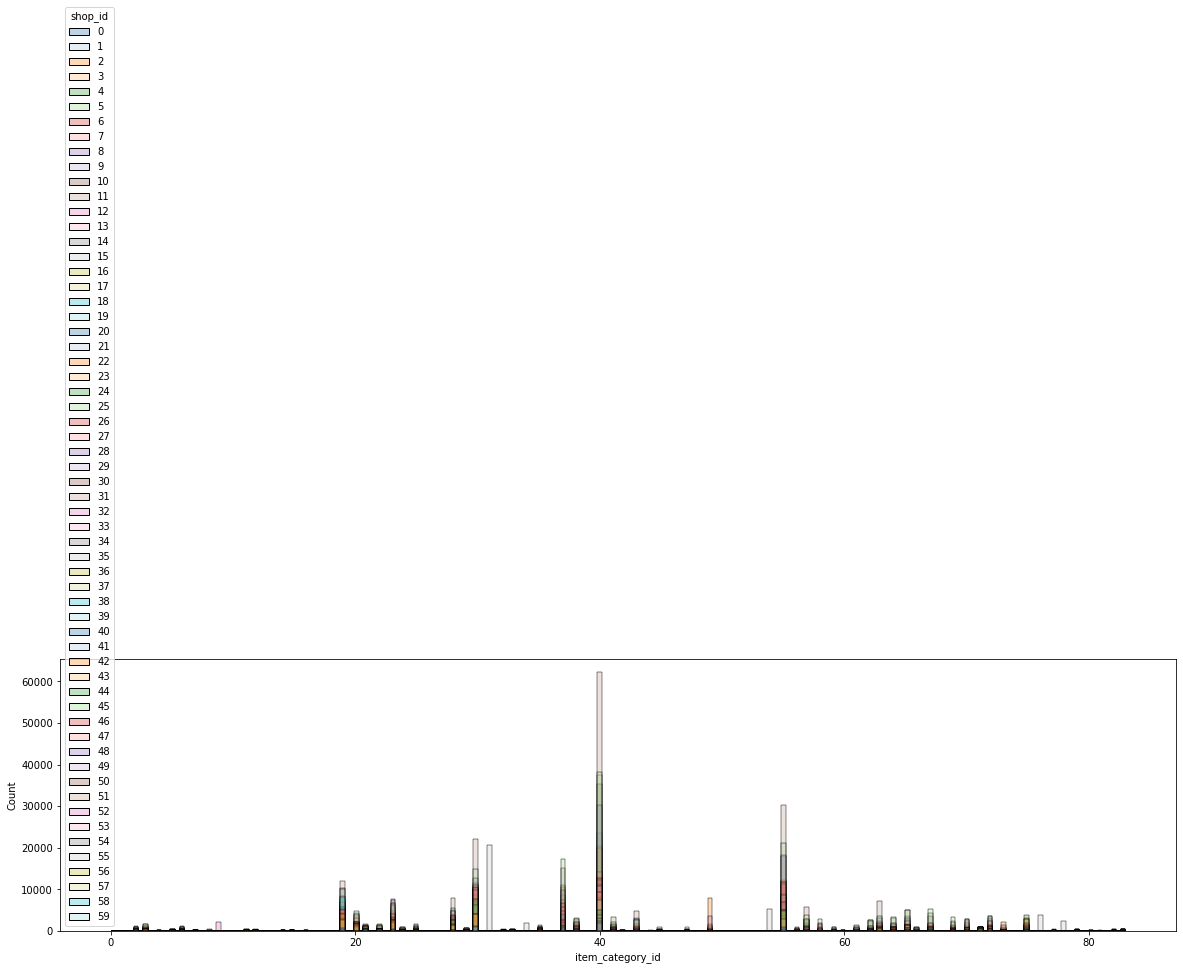

In [124]:
plt.figure(figsize=(20,5))
sns.histplot(data=df2, x='item_category_id', hue = 'shop_id', alpha = 0.3, palette = 'tab20')

In [138]:
df2.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'year', 'month', 'day', 'total_cnt_month', 'amount',
       'item_category_name', 'item_name', 'item_category_id'],
      dtype='object')

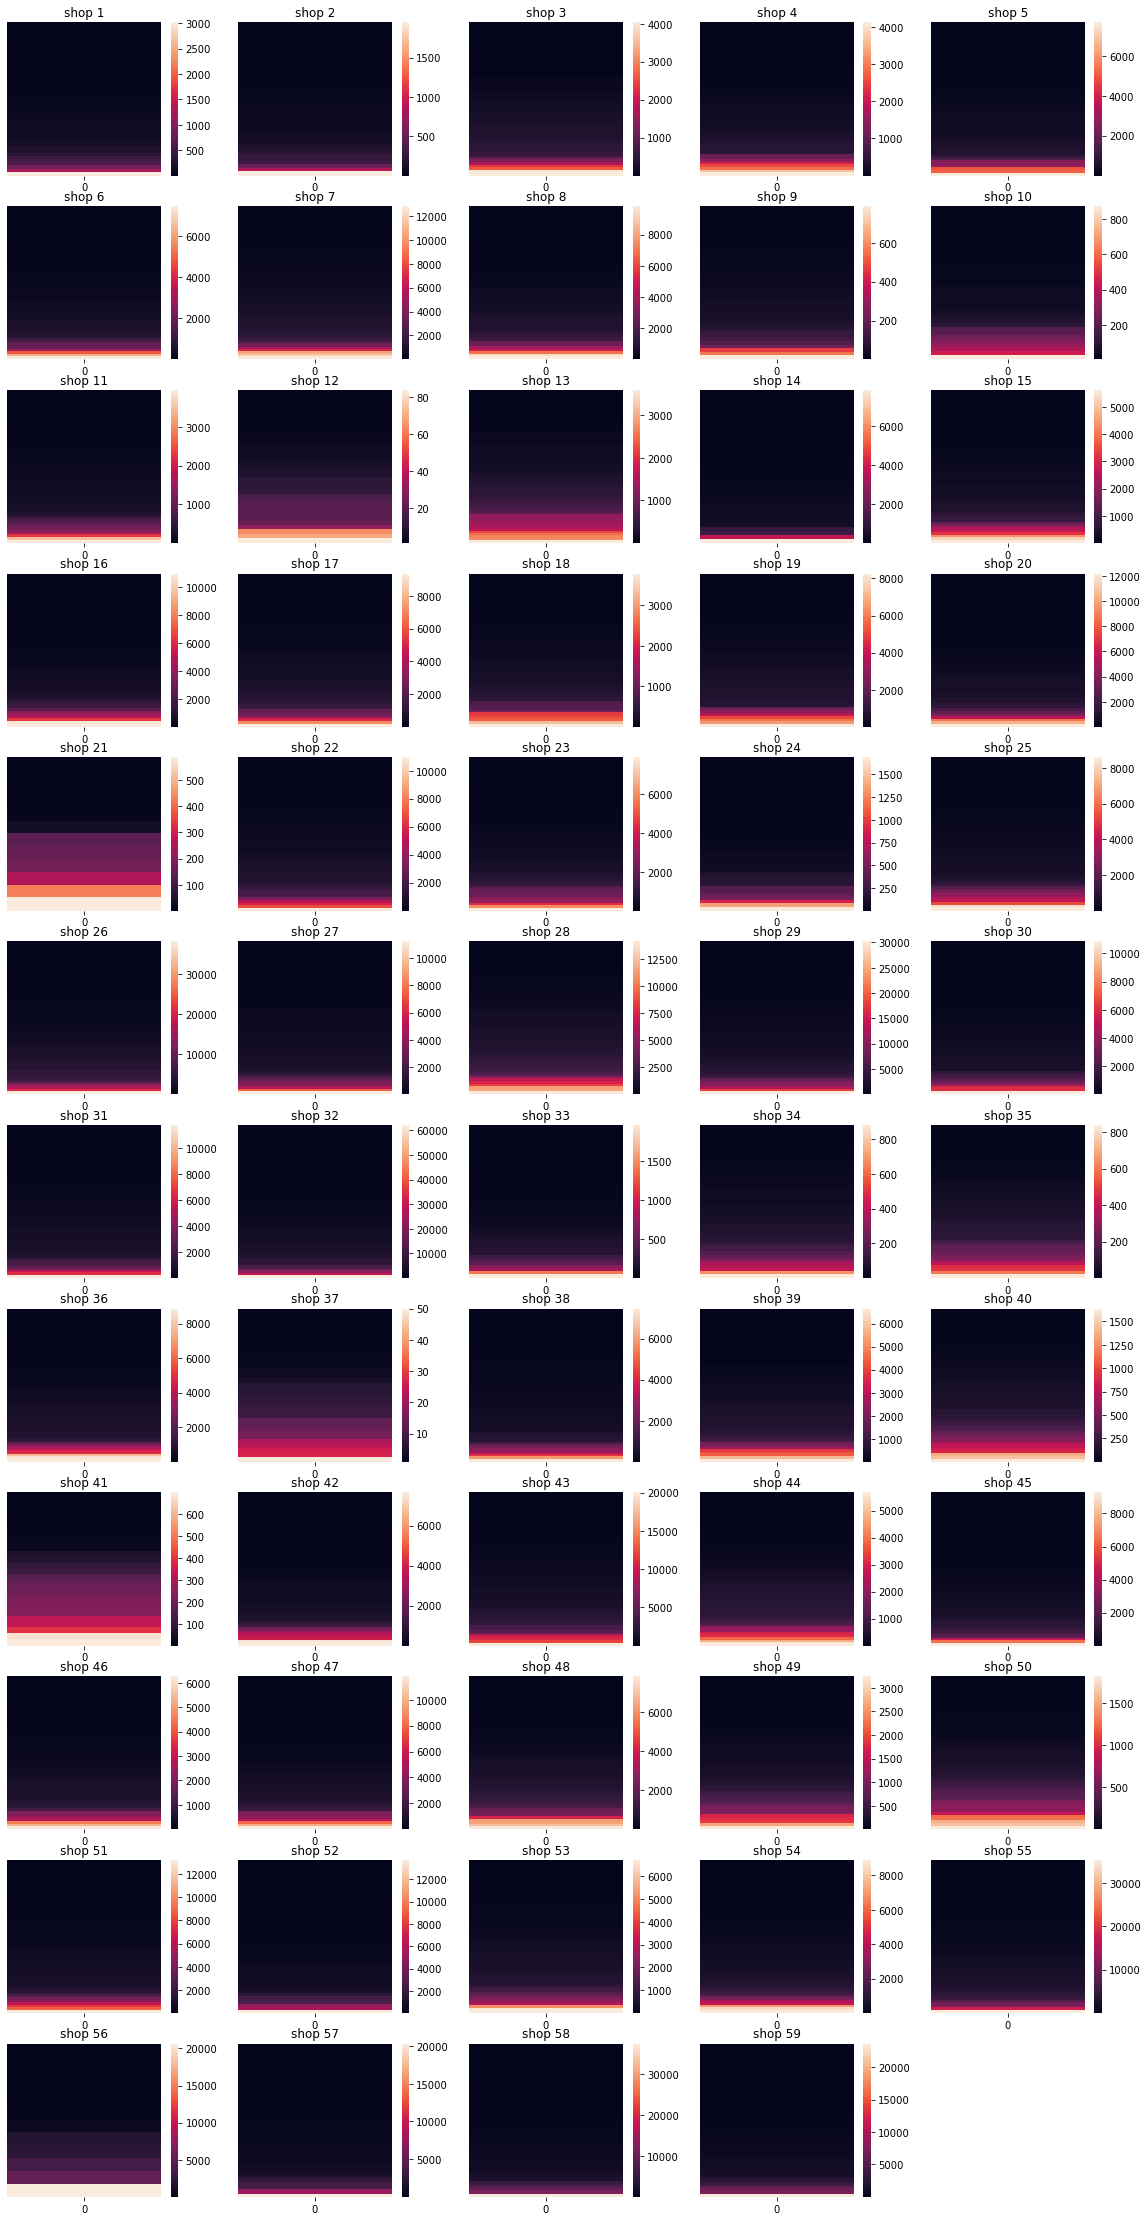

In [249]:
fig = plt.figure(figsize = (20, 40))
for num in range(1,60):
    df3 = df2[df2['shop_id'] == num-1]
    df3=sorted(df3['item_category_id'].value_counts())
    df3 = pd.DataFrame(df3)
    plt.subplot(12, 5, num)
    sns.heatmap(df3)
    plt.title(f'shop {num}')
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks([])

In [248]:
df3 = df2[df2['shop_id'] == 10]
df3['item_category_id'].value_counts()




30    3955
40    3490
55    2301
19    1551
28    1320
37    1158
23    1032
75     920
20     720
71     513
63     373
21     255
35     251
67     248
64     212
41     205
3      196
29     184
38     183
22     181
69     177
65     155
6      138
2      134
43     131
73     130
62     111
82     110
72     106
33     100
24      96
83      89
49      86
12      80
70      72
58      50
5       48
7       36
15      36
56      32
61      31
11      31
25      28
14      23
45      23
16      14
81      13
42      12
59      11
57       9
77       8
60       7
4        6
66       6
13       5
47       3
50       2
Name: item_category_id, dtype: int64

In [254]:
df3

,0
0,1
1,1
2,1
3,3
4,5
5,10
6,10
7,14
8,28
9,31


In [253]:
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)
        
    plt.figure(1 , figsize = (12, 6))
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

change_n_clusters([2,3,4,5,6,7,8,9,10,11], )

ValueError: could not convert string to float: 'Подарки - Настольные игры'

NameError: name 'df2' is not defined